Load Libraries

In [42]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#!pip install dython

from dython.nominal import associations
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

#!pip install kneed #Correct the typo in pip install command
from kneed import KneeLocator #Import KneeLocator class

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

Load Data

In [ ]:
file_id = '1U2UaHWRSkUXfJBn4kBHPYttd3dvw_CZF'
url = f'https://drive.google.com/uc?id={file_id}'
Nba_data = pd.read_csv(url, encoding='utf-8')

# dep_var = 'distance' --> .678
# dep_var = 'turnovers' #--> .788
#dep_var = 'assists' #--> .0.597
dep_var = 'turnovers' #--> .788
Nba_data = Nba_data[Nba_data['season'].str[:4].astype(int) > 2012]

# testing
Nba_data = Nba_data.loc[(Nba_data['distance'] != 0) & (Nba_data['touches'] != 0)]

Checking Data

In [44]:
Nba_data.head()

,game_id,season,team_id,team_name,tri_code,team_slug,minutes,field_goals_made,field_goals_attempted,field_goals_percentage,...,uncontested_field_goals_percentage,field_goal_percentage,defended_at_rim_field_goals_made,defended_at_rim_field_goals_attempted,defended_at_rim_field_goal_percentage,opponent_points,is_home_team,won_game,is_playoff_game,is_regular_game
12495,41300405,2013-14,1610612759,Spurs,SAS,spurs,240:00,37.0,78.0,0.474,...,0.475,0.474,15.0,24.0,0.625,87.0,1,1,1,0
12496,41300404,2013-14,1610612748,Heat,MIA,heat,240:00,32.0,71.0,0.451,...,0.439,0.451,16.0,19.0,0.842,107.0,1,0,1,0
12497,41300403,2013-14,1610612748,Heat,MIA,heat,240:00,32.0,62.0,0.516,...,0.516,0.516,14.0,20.0,0.700,111.0,1,0,1,0
12498,41300402,2013-14,1610612759,Spurs,SAS,spurs,240:00,36.0,82.0,0.439,...,0.452,0.439,17.0,24.0,0.708,98.0,1,0,1,0
12499,41300401,2013-14,1610612759,Spurs,SAS,spurs,240:00,40.0,68.0,0.588,...,0.472,0.588,12.0,21.0,0.571,95.0,1,1,1,0


Shake's edit:
Filter out data from before 2013 season

In [45]:
# Nba_data = Nba_data[Nba_data['season'].str[:4].astype(int) > 2012]

# # testing
# Nba_data = Nba_data.loc[(Nba_data['distance'] != 0) & (Nba_data['touches'] != 0)]

Drop Unnecessary columns (run code, then comment when encounter an eror)

In [46]:
Nba_data = Nba_data.drop(columns=['game_id', 'team_id', 'season', 'is_playoff_game', 'is_regular_game'])

Check Data

In [47]:
Nba_data

,team_name,tri_code,team_slug,minutes,field_goals_made,field_goals_attempted,field_goals_percentage,three_pointers_made,three_pointers_attempted,three_pointers_percentage,...,uncontested_field_goals_made,uncontested_field_goals_attempted,uncontested_field_goals_percentage,field_goal_percentage,defended_at_rim_field_goals_made,defended_at_rim_field_goals_attempted,defended_at_rim_field_goal_percentage,opponent_points,is_home_team,won_game
12495,Spurs,SAS,spurs,240:00,37.0,78.0,0.474,12.0,26.0,0.462,...,19.0,40.0,0.475,0.474,15.0,24.0,0.625,87.0,1,1
12496,Heat,MIA,heat,240:00,32.0,71.0,0.451,9.0,22.0,0.409,...,18.0,41.0,0.439,0.451,16.0,19.0,0.842,107.0,1,0
12497,Heat,MIA,heat,240:00,32.0,62.0,0.516,10.0,21.0,0.476,...,16.0,31.0,0.516,0.516,14.0,20.0,0.700,111.0,1,0
12498,Spurs,SAS,spurs,240:00,36.0,82.0,0.439,12.0,26.0,0.462,...,19.0,42.0,0.452,0.439,17.0,24.0,0.708,98.0,1,0
12499,Spurs,SAS,spurs,240:00,40.0,68.0,0.588,13.0,25.0,0.520,...,17.0,36.0,0.472,0.588,12.0,21.0,0.571,95.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55236,Cavaliers,CLE,cavaliers,240:00,44.0,94.0,0.468,17.0,43.0,0.395,...,26.0,64.0,0.406,0.468,20.0,29.0,0.690,113.0,0,1
55237,Pistons,DET,pistons,240:00,41.0,92.0,0.446,11.0,32.0,0.344,...,22.0,50.0,0.440,0.446,14.0,32.0,0.438,103.0,0,0
55238,Hawks,ATL,hawks,240:00,39.0,93.0,0.419,5.0,29.0,0.172,...,16.0,46.0,0.348,0.419,17.0,25.0,0.680,116.0,0,0
55239,Lakers,LAL,lakers,240:00,41.0,90.0,0.456,10.0,29.0,0.345,...,22.0,46.0,0.478,0.456,22.0,34.0,0.647,119.0,0,0


Instead of points as the dependent variable. Lets try the field goal percentage column. Reason: Field goals count as all shots attempted.

Detecting missing values.
new_data is filtering the DataFrame Nba_data to remove rows where the points column has missing (NaN) values.

In [48]:
#Can drop because its a small percentage of data
def show_missing_vals(df:pd.DataFrame)->pd.DataFrame:
    return Nba_data.isna().sum().divide(len(Nba_data)).sort_values(ascending=False)

print(show_missing_vals(Nba_data))

#Cleaned data stored in a variable
cleaned_Nba_data = Nba_data.dropna()

cleaned_Nba_data.isna().sum().sum()

rebound_percentage              0.000142
defensive_rebound_percentage    0.000142
estimated_defensive_rating      0.000142
defensive_rating                0.000142
estimated_net_rating            0.000142
                                  ...   
blocks                          0.000000
turnovers                       0.000000
fouls_personal                  0.000000
points                          0.000000
won_game                        0.000000
Length: 67, dtype: float64


0

Check Data

In [49]:
cleaned_Nba_data['field_goals_percentage'] = cleaned_Nba_data['field_goals_percentage'].astype(float)
cleaned_Nba_data.head()

C:\Users\abhi-\AppData\Local\Temp\ipykernel_14236\3668769684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_Nba_data['field_goals_percentage'] = cleaned_Nba_data['field_goals_percentage'].astype(float)


,team_name,tri_code,team_slug,minutes,field_goals_made,field_goals_attempted,field_goals_percentage,three_pointers_made,three_pointers_attempted,three_pointers_percentage,...,uncontested_field_goals_made,uncontested_field_goals_attempted,uncontested_field_goals_percentage,field_goal_percentage,defended_at_rim_field_goals_made,defended_at_rim_field_goals_attempted,defended_at_rim_field_goal_percentage,opponent_points,is_home_team,won_game
12495,Spurs,SAS,spurs,240:00,37.0,78.0,0.474,12.0,26.0,0.462,...,19.0,40.0,0.475,0.474,15.0,24.0,0.625,87.0,1,1
12496,Heat,MIA,heat,240:00,32.0,71.0,0.451,9.0,22.0,0.409,...,18.0,41.0,0.439,0.451,16.0,19.0,0.842,107.0,1,0
12497,Heat,MIA,heat,240:00,32.0,62.0,0.516,10.0,21.0,0.476,...,16.0,31.0,0.516,0.516,14.0,20.0,0.700,111.0,1,0
12498,Spurs,SAS,spurs,240:00,36.0,82.0,0.439,12.0,26.0,0.462,...,19.0,42.0,0.452,0.439,17.0,24.0,0.708,98.0,1,0
12499,Spurs,SAS,spurs,240:00,40.0,68.0,0.588,13.0,25.0,0.520,...,17.0,36.0,0.472,0.588,12.0,21.0,0.571,95.0,1,1


Removing Highly Correlated Variables

In [50]:
#Create a function to remove highly correlated values from the data
def removeHighCorr (data,dep_var,thresh):
  corr_matrix=associations(dataset=data.drop(dep_var,axis=1), compute_only=True)['corr'].abs()
  upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  to_drop=[column for column in upper_tri.columns if any(upper_tri[column]>thresh)]
  new_data=data.drop(to_drop,axis=1)
  return new_data

nba_no_high_corr = removeHighCorr(cleaned_Nba_data,dep_var,0.7)

In [51]:
nba_no_high_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28190 entries, 12495 to 55240
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   team_name                              28190 non-null  object 
 1   minutes                                28190 non-null  object 
 2   field_goals_made                       28190 non-null  float64
 3   field_goals_attempted                  28190 non-null  float64
 4   three_pointers_made                    28190 non-null  float64
 5   three_pointers_percentage              28190 non-null  float64
 6   free_throws_made                       28190 non-null  float64
 7   free_throws_percentage                 28190 non-null  float64
 8   rebounds_offensive                     28190 non-null  float64
 9   rebounds_defensive                     28190 non-null  float64
 10  steals                                 28190 non-null  float64
 11  blo

Remove near zero variance

In [52]:
#Before applying VarianceThreshold, select only numerical features
numerical_features = nba_no_high_corr.select_dtypes(include=np.number).columns
nba_no_high_corr_numeric = nba_no_high_corr[numerical_features]

vThreshold = VarianceThreshold(threshold = 0.1)
vThreshold.fit_transform(nba_no_high_corr_numeric)

vars = nba_no_high_corr_numeric.columns[vThreshold.get_support()]

nba_no_high_corr_nzv_df = nba_no_high_corr[vars] #New data from scrubing #Nzv near zero variance
nba_no_high_corr_nzv_df.head()

,field_goals_made,field_goals_attempted,three_pointers_made,free_throws_made,rebounds_offensive,rebounds_defensive,steals,blocks,turnovers,fouls_personal,...,touches,secondary_assists,free_throw_assists,assists,contested_field_goals_made,contested_field_goals_attempted,uncontested_field_goals_made,uncontested_field_goals_attempted,defended_at_rim_field_goals_made,is_home_team
12495,37.0,78.0,12.0,18.0,6.0,34.0,5.0,4.0,8.0,21.0,...,467.0,4.0,1.0,25.0,18.0,38.0,19.0,40.0,15.0,1
12496,32.0,71.0,9.0,13.0,6.0,21.0,7.0,1.0,13.0,25.0,...,377.0,0.0,1.0,13.0,14.0,30.0,18.0,41.0,16.0,1
12497,32.0,62.0,10.0,18.0,5.0,21.0,8.0,1.0,20.0,26.0,...,361.0,2.0,0.0,17.0,16.0,31.0,16.0,31.0,14.0,1
12498,36.0,82.0,12.0,12.0,11.0,26.0,7.0,1.0,11.0,20.0,...,436.0,6.0,1.0,26.0,17.0,40.0,19.0,42.0,17.0,1
12499,40.0,68.0,13.0,17.0,5.0,34.0,8.0,4.0,22.0,14.0,...,441.0,2.0,3.0,30.0,23.0,32.0,17.0,36.0,12.0,1


Standardize Data

In [53]:
#Standardizing Data
Nba_data_std = StandardScaler().fit_transform(nba_no_high_corr_nzv_df)
Nba_data_std = pd.DataFrame(Nba_data_std, columns = nba_no_high_corr_nzv_df.columns)
Nba_data_std.head()

,field_goals_made,field_goals_attempted,three_pointers_made,free_throws_made,rebounds_offensive,rebounds_defensive,steals,blocks,turnovers,fouls_personal,...,touches,secondary_assists,free_throw_assists,assists,contested_field_goals_made,contested_field_goals_attempted,uncontested_field_goals_made,uncontested_field_goals_attempted,defended_at_rim_field_goals_made,is_home_team
0,-0.536933,-1.152359,0.314262,0.086444,-1.136080,0.096504,-0.890623,-0.332514,-1.409105,0.213137,...,1.568911,0.511283,-0.555514,0.240452,0.049768,0.209570,-0.615262,-1.277911,-0.227049,1.0
1,-1.473669,-2.093914,-0.415980,-0.750273,-1.136080,-2.302148,-0.204330,-1.530211,-0.115173,1.147049,...,-0.943080,-1.572283,-0.555514,-2.045475,-0.891982,-0.911903,-0.818993,-1.149030,-0.009419,1.0
2,-1.473669,-3.304484,-0.172566,0.086444,-1.399332,-2.302148,0.138817,-1.530211,1.696331,1.380527,...,-1.389657,-0.530500,-1.244528,-1.283499,-0.421107,-0.771719,-1.226455,-2.437841,-0.444680,1.0
3,-0.724281,-0.614327,0.314262,-0.917616,0.180176,-1.379590,-0.204330,-1.530211,-0.632746,-0.020341,...,0.703669,1.553066,-0.555514,0.430946,-0.185669,0.489938,-0.615262,-1.020149,0.208212,1.0
4,0.025108,-2.497437,0.557677,-0.080899,-1.399332,0.096504,0.138817,-0.332514,2.213904,-1.421209,...,0.843225,-0.530500,0.822516,1.192922,1.226957,-0.631535,-1.022724,-1.793436,-0.879941,1.0


Apply PCA

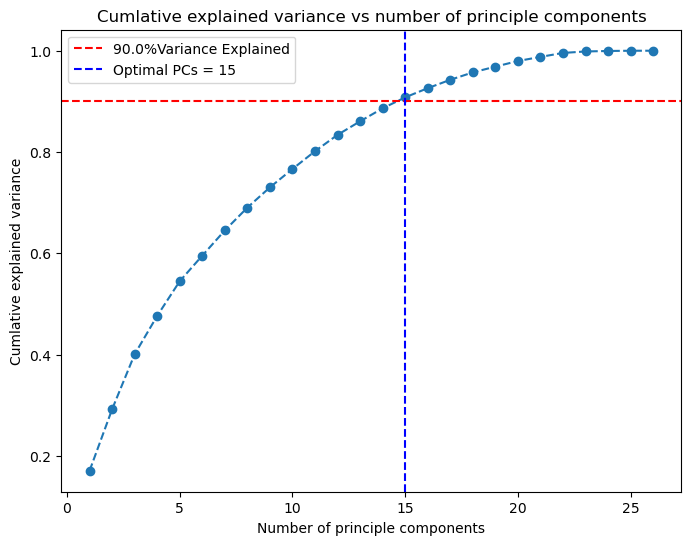

In [54]:
#Apply PCA without specifying the number of components
pca = PCA()
pca.fit(Nba_data_std)

#Compute explained variance
explained_variance = pca.explained_variance_ratio_
cumlative_variance = np.cumsum(explained_variance)
#explained_variance
cumlative_variance


#Find number of components that explains at least some threshold of variance
threshold = 0.9
n_components_thresh = np.argmax(cumlative_variance >= threshold) + 1
n_components_thresh

#Plot cumlative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1,len(cumlative_variance)+1), cumlative_variance, marker='o', linestyle="--")
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}%Variance Explained')
plt.axvline(x=n_components_thresh, color='b', linestyle='--', label=f'Optimal PCs = {n_components_thresh}')
plt.xlabel("Number of principle components")
plt.ylabel("Cumlative explained variance")
plt.title("Cumlative explained variance vs number of principle components")
plt.legend()

Elbow Method

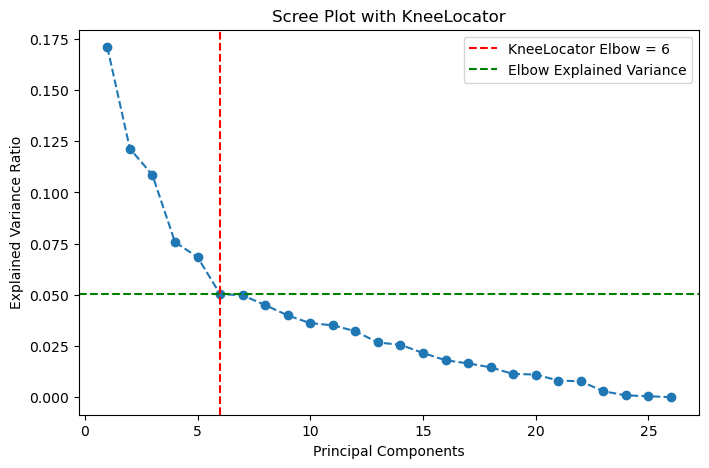

In [55]:
# Find the elbow point mathemetically
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve='convex', direction='decreasing')
scree_components = knee_locator.knee

# scree plot with knee locator
plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_variance ) + 1), explained_variance, marker='o', linestyle='--')
plt.axvline(x=scree_components, color='r', linestyle='--', label=f'KneeLocator Elbow = {scree_components}')
plt.axhline(y=explained_variance[scree_components-1], color='g', linestyle='--', label=f'Elbow Explained Variance')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot with KneeLocator")
plt.legend()
plt.show()

Compare cumulative explained variance for both methods

In [56]:
# compare cumulative explained variance for both methods
exp_varScree = np.sum(explained_variance[:scree_components])
exp_varThresh = np.sum(explained_variance[:n_components_thresh])

print(f"Percentage of variance explained by {scree_components} components: {exp_varScree:.2%}")
print(f"Percentage of variance explained by {n_components_thresh} components: {exp_varThresh:.2%}")

Percentage of variance explained by 6 components: 59.56%
Percentage of variance explained by 15 components: 90.80%


Converting PCA's to a Data Frame

In [57]:
# Conduct PCA using optimal number of components
pca = PCA(n_components=n_components_thresh)
Nba_Data_pca = pca.fit_transform(Nba_data_std)

# Convert PCA results to dataframe
NBA_Data_pca_df = pd.DataFrame(Nba_Data_pca, columns=[f'PC{i+1}' for i in range(Nba_Data_pca.shape[1])])
NBA_Data_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.836076,-0.093469,-1.823653,-1.147144,0.265428,0.886196,0.269780,-1.807289,0.136526,-0.145392,-0.720937,-1.246091,-0.764636,-1.605178,0.684476
1,-4.510371,-3.639232,2.199417,-0.474265,0.081958,0.366237,0.167679,0.113501,0.809094,1.368679,-1.162668,-0.791015,0.880604,-1.131567,0.992953
2,-5.134960,-3.650561,1.295119,-0.134759,1.778700,1.866971,-0.144658,-0.104078,1.640436,1.857531,-0.831453,0.138875,0.441660,-0.361269,0.010296
3,-1.319611,-1.267541,1.328182,-2.005023,0.034173,2.278727,0.416532,-1.386396,-0.250690,0.215506,-0.704285,-0.052085,-0.561627,-0.089666,0.926685
4,-0.962063,-1.246071,-2.206735,-0.259856,2.953603,1.740946,-0.440545,-0.828108,-1.194759,0.322234,-1.098523,1.284102,1.586031,-1.238000,-0.915808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28185,2.683823,-1.634449,1.725812,-0.460703,-0.372394,-0.304928,-0.288602,1.425032,0.138608,-0.628746,0.770030,-0.726301,0.545516,0.359725,1.000290
28186,0.844323,1.761729,-0.639899,-0.335196,-0.778243,-1.020170,-1.605591,-1.222650,0.509483,0.131020,2.774501,-0.081070,2.009945,0.867117,-0.134162
28187,-0.744332,2.445866,2.174970,0.703054,1.254659,0.340712,1.274264,0.881821,-0.636772,-1.845909,-1.071899,-0.024557,-0.794373,0.311753,-0.510190
28188,-1.015972,0.099900,2.226081,-1.262099,0.056144,-1.555766,-0.628025,0.550676,0.345721,0.091810,0.785534,1.091177,-0.359917,-0.296666,0.121459


Display the loadings of each variable in each PC

In [58]:
var_names = nba_no_high_corr_nzv_df.columns
housing_loadings = pd.DataFrame(pca.components_.T, index=var_names, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
housing_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
field_goals_made,0.367843,0.090024,0.057029,-0.276253,0.223292,-0.043921,0.004241,0.071600,0.158786,0.055918,0.008502,0.094291,0.103120,-0.077708,-0.045440
field_goals_attempted,0.260602,0.316697,0.215443,-0.083209,-0.247806,-0.163284,-0.011753,0.109468,-0.055673,-0.030575,-0.058459,-0.085407,-0.026392,0.182533,0.049301
three_pointers_made,0.325453,-0.192451,0.013709,0.014977,-0.060705,-0.015887,0.056049,-0.062010,0.115490,0.077498,0.061369,0.199274,0.058456,-0.051179,-0.106982
free_throws_made,-0.065340,0.054232,-0.030106,0.327214,0.248353,-0.150165,0.516076,-0.120091,0.120621,-0.030458,0.041313,-0.076983,-0.391986,-0.111015,-0.439856
rebounds_offensive,-0.008653,0.344995,0.139388,-0.035454,-0.347025,0.050070,0.259784,-0.104477,0.012891,0.091675,0.166892,0.325533,0.074762,0.005155,-0.122816


Compute absolute loadings

In [59]:
# Compute absolute loadings
abs_loadings = np.abs(pca.components_)

# compute median loading across all PCs
median_loadings =  np.median(abs_loadings)

# identify important variables (those loadings that exceed the median loading)
important_vars = np.any(abs_loadings > median_loadings, axis=0)

# extract var names
important_features = np.array(var_names)[important_vars]
#important_features

important_features

array(['field_goals_made', 'field_goals_attempted', 'three_pointers_made',
       'free_throws_made', 'rebounds_offensive', 'rebounds_defensive',
       'steals', 'blocks', 'turnovers', 'fouls_personal',
       'plus_minus_points', 'estimated_defensive_rating',
       'estimated_pace', 'distance', 'rebound_chances_offensive',
       'rebound_chances_defensive', 'touches', 'secondary_assists',
       'free_throw_assists', 'assists', 'contested_field_goals_made',
       'contested_field_goals_attempted', 'uncontested_field_goals_made',
       'uncontested_field_goals_attempted',
       'defended_at_rim_field_goals_made', 'is_home_team'], dtype=object)

Data partioning, partition the data such that 80% is used for training and 20%

In [60]:
#dep_variable = Nba_data_std['points']
#ind_variable = Nba_data_std.loc[:, Nba_data_std.columns != 'points']

dep_variable = Nba_data_std[dep_var]
ind_variable = Nba_data_std.loc[:, Nba_data_std.columns != dep_var]

train_x, test_x, train_y, test_y = train_test_split(ind_variable, dep_variable, test_size=0.2, random_state=2142)

modle fitting results

In [61]:
#Add intercept term into the data before modeling
train_X = sm.add_constant(train_x)
#Model with training data
model = sm.OLS(train_y, train_X).fit()
#print model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                assists   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1334.
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:28:52   Log-Likelihood:                -21755.
No. Observations:               22552   AIC:                         4.356e+04
Df Residuals:                   22526   BIC:                         4.377e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [65]:
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor(n_neighbors=5, n_jobs=1).fit(train_x, train_y)
knn_model

KNeighborsRegressor(n_jobs=1)

In [66]:
knn_pred = knn_model.predict(test_x)

import statsmodels.api as sm
import scipy.stats as stats

#compute residuals
knn_res = test_y - knn_pred


from dmba import regressionSummary

# ind test data (actual) vs knn predictions
regressionSummary(test_y, knn_pred)


Regression statistics

                      Mean Error (ME) : 0.0167
       Root Mean Squared Error (RMSE) : 0.7381
            Mean Absolute Error (MAE) : 0.5901
          Mean Percentage Error (MPE) : 52.7705
Mean Absolute Percentage Error (MAPE) : 154.4293
